<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data
*   Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
# NOTE!!!
#
# The following lines are not needed in Google Colab
#
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

from sklearn_pandas import DataFrameMapper

print('Done importing stuff.')

Done importing stuff.


This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframes


Load the data


In [3]:
# NOTE!!!
#
# The following lines are not needed in Google Colab.
#
# from js import fetch
# import io
#
# URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
# data = pd.read_csv(text1)

In [4]:
# NOTE!!!
#
# The following lines are not needed in Google Colab.
# Instead, use the next 3 cells to retrieve the files and create the dataframes
#
# URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# resp2 = await fetch(URL2)
# text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
# X = pd.read_csv(text2)

In [5]:
# Retrieve the files
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv

--2023-10-26 22:16:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12100 (12K) [text/csv]
Saving to: ‘dataset_part_2.csv.2’

dataset_part_2.csv. 100%[===================>]  11.82K  --.-KB/s    in 0s      

2023-10-26 22:16:05 (322 MB/s) - ‘dataset_part_2.csv.2’ saved [12100/12100]

--2023-10-26 22:16:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdom

In [6]:
# Create the first dataset
data = pd.read_csv("/content/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
data.shape

(90, 18)

In [8]:
# Load the 2nd dataset
X = pd.read_csv("/content/dataset_part_3.csv")
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [9]:
# Define some constants to use later
score_index = ['score (train)', 'score (test)', 'jaccard score (test)', 'f1 score (test)']

# Preparing the Data

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
Y = data['Class'].to_numpy()
type(Y)

numpy.ndarray

In [11]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [12]:
# students get this
transform = preprocessing.StandardScaler()

test_X = transform.fit_transform(np.array(X).reshape(-1,1))

In [13]:
mapper = DataFrameMapper([(X.columns, preprocessing.StandardScaler())])
scaled_features = mapper.fit_transform(X.copy())
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
scaled_features_df.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,-1.712912,-1.948145e-16,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,1.812654,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.97344,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.97344,-0.106,-0.106,1.527525,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features_df, Y, test_size=0.2, random_state=2)
print(Y_test)

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1]


we can see we only have 18 test samples.


In [15]:
Y_test.shape

(18,)

# Logistic Regression

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [16]:
parameters ={'C':[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr_section = 'Logistic Regression'

In [17]:
# Setup the model parameters
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters, cv=10)

In [18]:
# Train the model
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [19]:
# Check model results
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
lr_train_score = logreg_cv.best_score_
print("accuracy :",lr_train_score)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
# Evaluate model using test data
lr_test_score = logreg_cv.score(X_test, Y_test)
print("accuracy score: ", lr_test_score)

accuracy score:  0.8333333333333334


Lets look at the confusion matrix:


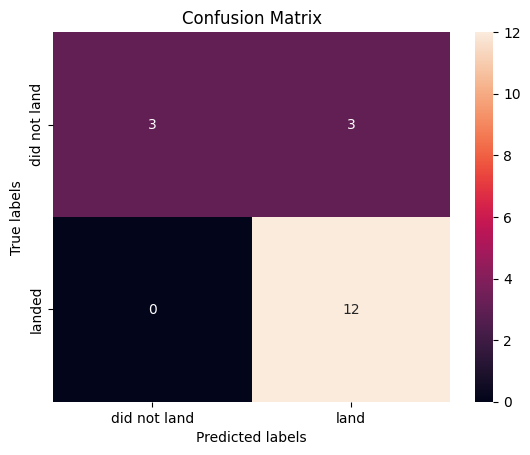

In [21]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [22]:
logreg_report = classification_report(Y_test, yhat)
print(logreg_report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [23]:
lr_jaccard_score = jaccard_score(Y_test, yhat)
lr_f1_score = f1_score(Y_test, yhat)

temp_df = {lr_section: [lr_train_score, lr_test_score, lr_jaccard_score, lr_f1_score]}
scores_df =  pd.DataFrame(data=temp_df, index = score_index)
scores_df

,Logistic Regression
score (train),0.846429
score (test),0.833333
jaccard score (test),0.800000
f1 score (test),0.888889


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


# Support Vector Machine (SVM)

## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [24]:
svm_section = 'SVM'
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [25]:
svm_cv= GridSearchCV(svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [26]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
svm_train_score = svm_cv.best_score_
print("accuracy :", svm_train_score)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [27]:
# Evaluate model using test data
svm_test_score = svm_cv.score(X_test, Y_test)
print("accuracy score: ", svm_test_score)

accuracy score:  0.8333333333333334


We can plot the confusion matrix


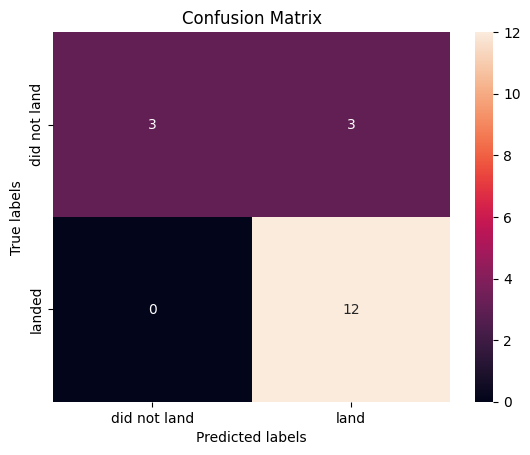

In [28]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [29]:
svm_report = classification_report(Y_test, yhat)
print(svm_report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [30]:
svm_jaccard_score = jaccard_score(Y_test, yhat)
svm_f1_score = f1_score(Y_test, yhat)

temp_df = {svm_section: [svm_train_score, svm_test_score, svm_jaccard_score, svm_f1_score]}
temp_df2 = pd.DataFrame(data=temp_df, index = score_index)
scores_df = scores_df.join(temp_df2)
scores_df

,Logistic Regression,SVM
score (train),0.846429,0.848214
score (test),0.833333,0.833333
jaccard score (test),0.800000,0.800000
f1 score (test),0.888889,0.888889


# Decision Tree Classifier

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [31]:
tree_section = 'Decision Tree'
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [32]:
tree_cv= GridSearchCV(tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [38]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
tree_train_score = tree_cv.best_score_
print("accuracy :",tree_train_score)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [39]:
# Evaluate model using test data
tree_test_score = tree_cv.score(X_test, Y_test)
print("accuracy score: ", tree_test_score)

accuracy score:  0.8333333333333334


We can plot the confusion matrix


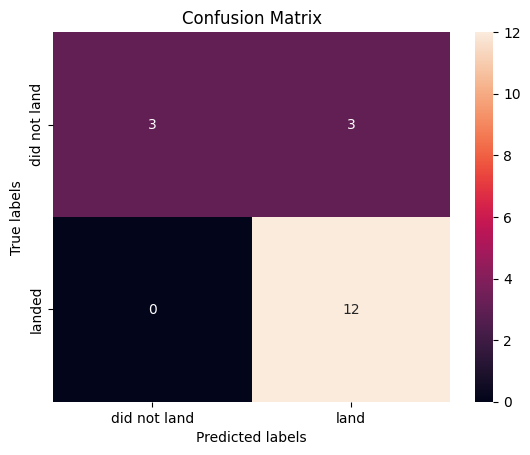

In [40]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [36]:
tree_report = classification_report(Y_test, yhat)
print(tree_report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [37]:
tree_jaccard_score = jaccard_score(Y_test, yhat)
tree_f1_score = f1_score(Y_test, yhat)

temp_df = {tree_section: [tree_train_score, tree_test_score, tree_jaccard_score, tree_f1_score]}
temp_df2 = pd.DataFrame(data=temp_df, index = score_index)
scores_df = scores_df.join(temp_df2)
scores_df

,Logistic Regression,SVM,Decision Tree
score (train),0.846429,0.848214,0.875000
score (test),0.833333,0.833333,0.833333
jaccard score (test),0.800000,0.800000,0.800000
f1 score (test),0.888889,0.888889,0.888889


# K-Nearest Neighbors (KNN)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [41]:
knn_section = 'KNN'
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [42]:
knn_cv= GridSearchCV(KNN, param_grid=parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [43]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
knn_train_score = knn_cv.best_score_
print("accuracy :", knn_train_score)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [44]:
# Evaluate model using test data
knn_test_score = knn_cv.score(X_test, Y_test)
print("accuracy score: ", knn_test_score)

accuracy score:  0.8333333333333334


We can plot the confusion matrix


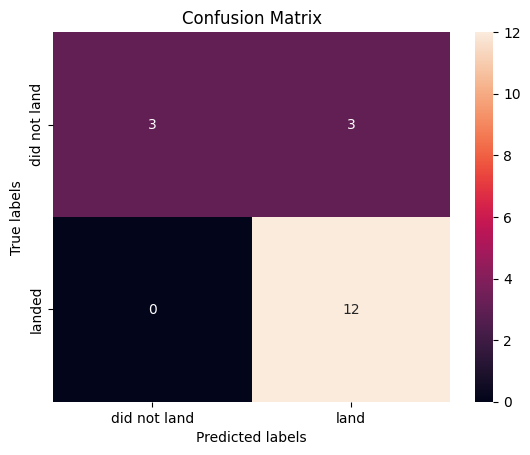

In [45]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [46]:
knn_report = classification_report(Y_test, yhat)
print(knn_report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [47]:
knn_jaccard_score = jaccard_score(Y_test, yhat)
knn_f1_score = f1_score(Y_test, yhat)

temp_df = {knn_section: [knn_train_score, knn_test_score, knn_jaccard_score, knn_f1_score]}
temp_df2 = pd.DataFrame(data=temp_df, index = score_index)
scores_df = scores_df.join(temp_df2)
scores_df

,Logistic Regression,SVM,Decision Tree,KNN
score (train),0.846429,0.848214,0.875000,0.848214
score (test),0.833333,0.833333,0.833333,0.833333
jaccard score (test),0.800000,0.800000,0.800000,0.800000
f1 score (test),0.888889,0.888889,0.888889,0.888889


# Determine Best Estimator

## TASK  12


Find the method performs best:


In [48]:
print("Accuracy Scores for the various methods (train data):")
print(" * Logistic Regression : ", logreg_cv.score(X_train, Y_train))
print(" * SVM                 : ", svm_cv.score(X_train, Y_train))
print(" * Decision Tree       : ", tree_cv.score(X_train, Y_train))
print(" * KNN                 : ", knn_cv.score(X_train, Y_train))

Accuracy Scores for the various methods (train data):
 * Logistic Regression :  0.875
 * SVM                 :  0.8888888888888888
 * Decision Tree       :  0.8611111111111112
 * KNN                 :  0.8611111111111112


In [49]:
print("Accuracy Scores for the various methods (test data):")
print(" * Logistic Regression : ", logreg_cv.score(X_test, Y_test))
print(" * SVM                 : ", svm_cv.score(X_test, Y_test))
print(" * Decision Tree       : ", tree_cv.score(X_test, Y_test))
print(" * KNN                 : ", knn_cv.score(X_test, Y_test))

Accuracy Scores for the various methods (test data):
 * Logistic Regression :  0.8333333333333334
 * SVM                 :  0.8333333333333334
 * Decision Tree       :  0.8333333333333334
 * KNN                 :  0.8333333333333334


In [50]:
print('Logistic Regression Report\n', logreg_report)

Logistic Regression Report
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [51]:
print('SVM Report\n', svm_report)

SVM Report
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [52]:
print('Decision Tree Report\n', tree_report)

Decision Tree Report
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [53]:
print('KNN Report\n', knn_report)

KNN Report
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [54]:
scores_df

,Logistic Regression,SVM,Decision Tree,KNN
score (train),0.846429,0.848214,0.875000,0.848214
score (test),0.833333,0.833333,0.833333,0.833333
jaccard score (test),0.800000,0.800000,0.800000,0.800000
f1 score (test),0.888889,0.888889,0.888889,0.888889


# Plot the Accuracy Scores

In [55]:
df_t = scores_df.T
df_t

,score (train),score (test),jaccard score (test),f1 score (test)
Logistic Regression,0.846429,0.833333,0.8,0.888889
SVM,0.848214,0.833333,0.8,0.888889
Decision Tree,0.875000,0.833333,0.8,0.888889
KNN,0.848214,0.833333,0.8,0.888889


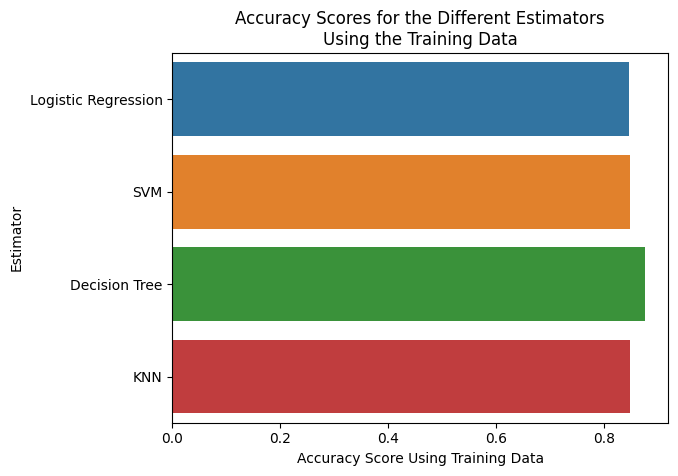

In [56]:
sns.barplot(df_t, x='score (train)', y=df_t.index)
plt.title('Accuracy Scores for the Different Estimators\nUsing the Training Data')
plt.ylabel('Estimator')
plt.xlabel('Accuracy Score Using Training Data')
plt.show()

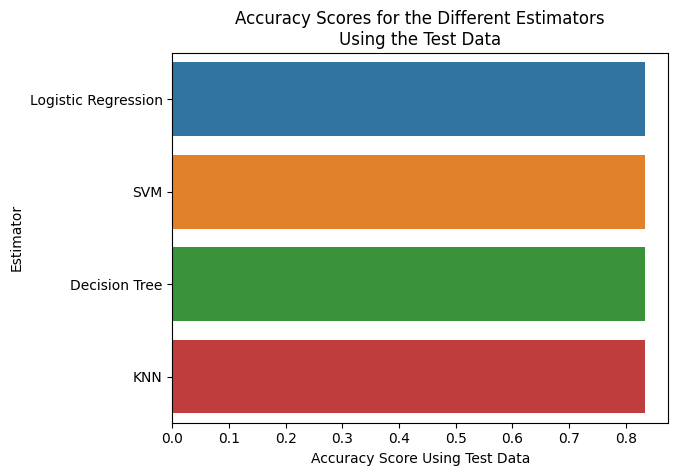

In [57]:
sns.barplot(df_t, x='score (test)', y=df_t.index)
plt.title('Accuracy Scores for the Different Estimators\nUsing the Test Data')
plt.ylabel('Estimator')
plt.xlabel('Accuracy Score Using Test Data')
plt.show()

In [58]:
df_t

,score (train),score (test),jaccard score (test),f1 score (test)
Logistic Regression,0.846429,0.833333,0.8,0.888889
SVM,0.848214,0.833333,0.8,0.888889
Decision Tree,0.875000,0.833333,0.8,0.888889
KNN,0.848214,0.833333,0.8,0.888889


In [59]:
ds = df_t.drop(['jaccard score (test)', 'f1 score (test)'], axis = 1)
ds


# temp_df = {knn_section: [knn_train_score, knn_test_score, knn_jaccard_score, knn_f1_score]}
# temp_df2 = pd.DataFrame(data=temp_df, index = score_index)
# scores_df = scores_df.join(temp_df2)
# scores_df

,score (train),score (test)
Logistic Regression,0.846429,0.833333
SVM,0.848214,0.833333
Decision Tree,0.875000,0.833333
KNN,0.848214,0.833333


In [60]:
ds = ds.reset_index()
ds

,index,score (train),score (test)
0,Logistic Regression,0.846429,0.833333
1,SVM,0.848214,0.833333
2,Decision Tree,0.875000,0.833333
3,KNN,0.848214,0.833333


In [61]:
tidy = ds.melt(id_vars='index').rename(columns=str.title)
tidy

,Index,Variable,Value
0,Logistic Regression,score (train),0.846429
1,SVM,score (train),0.848214
2,Decision Tree,score (train),0.875000
3,KNN,score (train),0.848214
4,Logistic Regression,score (test),0.833333
5,SVM,score (test),0.833333
6,Decision Tree,score (test),0.833333
7,KNN,score (test),0.833333


In [62]:
tidy.loc[tidy['Variable'] == 'score (train)', 'Variable'] = 'Training Set'
tidy.loc[tidy['Variable'] == 'score (test)', 'Variable'] = 'Test Set'
tidy.sort_values('Index', inplace=True)
tidy.reset_index(drop=True, inplace=True)
tidy

,Index,Variable,Value
0,Decision Tree,Training Set,0.875000
1,Decision Tree,Test Set,0.833333
2,KNN,Training Set,0.848214
3,KNN,Test Set,0.833333
4,Logistic Regression,Training Set,0.846429
5,Logistic Regression,Test Set,0.833333
6,SVM,Training Set,0.848214
7,SVM,Test Set,0.833333


In [63]:
train_val = tidy['Value'].iloc[2]
test_val = tidy['Value'].iloc[3]
print('Train value = {}; Test value = {}'.format(train_val, test_val))

Train value = 0.8482142857142858; Test value = 0.8333333333333334


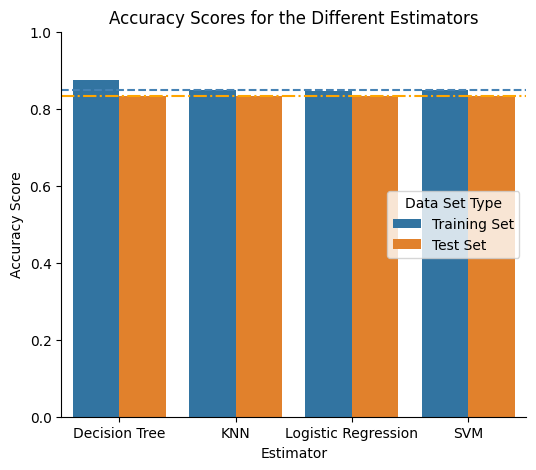

In [64]:
fig, ax1 = plt.subplots(figsize=(6, 5))
sns.barplot(x='Index', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
plt.legend(title='Data Set Type', loc='center right')
plt.title('Accuracy Scores for the Different Estimators')
plt.xlabel('Estimator')
plt.ylabel('Accuracy Score')
plt.ylim(0,1)
ax1.axhline(train_val, ls='--', color='steelblue')
ax1.axhline(test_val, ls='-.', color='orange')
plt.show()

# Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
